In [10]:
import plotnine
from plotnine.data import economics
from plotnine import ggplot, aes, geom_line
import pandas as pd
import numpy as np

In [71]:
lst ={i:[] for i in range(2,1000000)}

#lst

for i in lst:
    lst[i].append(i)
    res = i
    #print(i)
    while (res != 1):
        if (res %2) == 0:
            res = res/2
            lst[i].append(res)
        else:
            res = 3*res+1
            lst[i].append(res)

#lst


In [72]:
cnt = {k:len(v) for k,v in lst.items()}

df = pd.DataFrame.from_dict(cnt,orient="index").reset_index()
df.columns = ['Number','Iteration']
df

,Number,Iteration
0,2,2
1,3,8
2,4,3
3,5,6
4,6,9
...,...,...
999993,999995,259
999994,999996,114
999995,999997,114
999996,999998,259


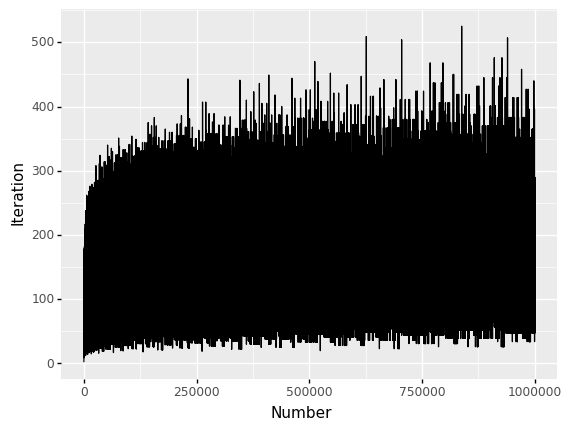

<ggplot: (123661170378)>

In [73]:

(
    ggplot(df)  # What data to use
    + aes(x="Number", y="Iteration")  # What variable to use
    + geom_line()  # Geometric object to use for drawing
    
)


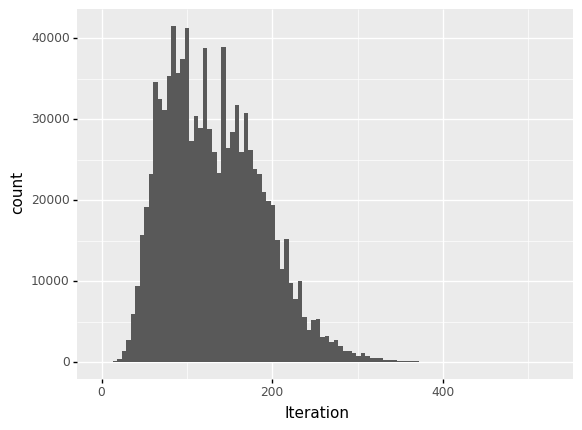

<ggplot: (123660872578)>

In [74]:

(
    ggplot(df)  # What data to use
    + aes( "Iteration")  # What variable to use
    + plotnine.geom_histogram(bins=100)  # Geometric object to use for drawing
)



In [2]:
def plot_number(i):
    ss = {k:v for k,v in enumerate(lst[i])}
    print(len(ss))
    df = pd.DataFrame.from_dict(ss,orient="index").reset_index()
    df.columns = ['Step','Number']
    df
    fig = (
        ggplot(df)  # What data to use
        + aes(x="Step", y="Number")  # What variable to use
        + geom_line()  # Geometric object to use for drawing
        
    )

    return fig



106


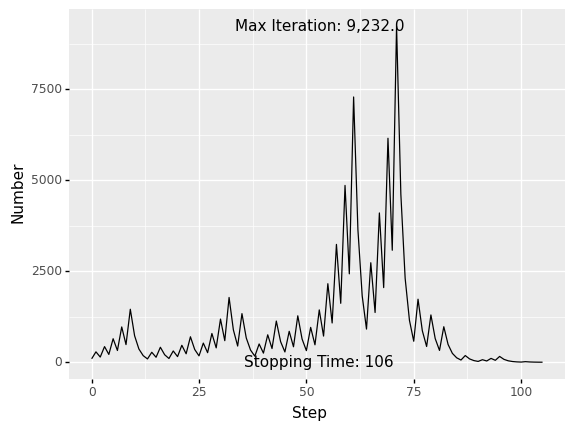

<ggplot: (115709452608)>

In [28]:
def plot_number(i, logarithmic = False):
    lst = list()
    #print(i)
    res = i
    while (res != 1):
        if (res %2) == 0:
            res = res/2
            lst.append(res)
        else:
            res = 3*res+1
            lst.append(res)

    ss = {k:v for k,v in enumerate(lst)}
    print(len(ss))
    df = pd.DataFrame.from_dict(ss,orient="index").reset_index()
    df.columns = ['Step','Number']
    df
    fig = (
        ggplot(df)  # What data to use
        + aes(x="Step", y="Number")  # What variable to use
        + geom_line()  # Geometric object to use for drawing    
        +plotnine.annotate('text', x=len(ss)/2, y = 1, label = f'Stopping Time: {len(ss)}')
        +plotnine.annotate('text', x=len(ss)/2, y = max(lst), label = f'Max Iteration: {max(lst):,}')
    )
    if logarithmic:
        fig = fig+plotnine.scale_y_log10()

    return fig

plot_number(190)